In [1]:
import sys
sys.path.append("../")
from Linearity import Neuron
import numpy as np
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import findfont, FontProperties
# print(plt.style.available)
plt.style.use('seaborn-white')
matplotlib.rcParams['font.family']
print(findfont(FontProperties(family=['sans-serif'])))

/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


In [2]:
#fileList = glob.glob("/media/sahil/NCBS_Shares_BGStim/patch_data/**/c?/plots/*.pkl")
neuronList = []
with open("/media/sahil/NCBS_Shares_BGStim/patch_data/current_clamp_files.txt", 'r') as fp:
    fileList = fp.read().splitlines()
    for i,filename in enumerate(fileList):
        fileList[i] += "plots/" + filename.split('/')[-2] + ".pkl"
        try:
            print ("Reading ", fileList[i])
            neuronList.append(Neuron.load(fileList[i]))
        except:
            print ("Couldn't read", fileList[i])
print ("Read {} files.".format(len(fileList)))

Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150828/c2/plots/c2.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150902/c1/plots/c1.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150902/c2/plots/c2.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150904/c1/plots/c1.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150904/c3/plots/c3.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160126/c3/plots/c3.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160209/c4/plots/c4.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160219/c5/plots/c5.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160223/c2/plots/c2.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160223/c3/plots/c3.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160513/c5/plots/c5.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160617/c5/plots/c5.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160817/c2/plots/c2.pkl
Reading  /media/sahil/NCB

In [3]:
neuronList[0].features

{0: 'epsp_max',
 1: 'epsp_area',
 2: 'epsp_avg',
 3: 'epsp_time_to_peak',
 4: 'epsp_area_to_peak',
 5: 'epsp_min',
 6: 'epsp_onset'}

## 3 C: 4 measures of sublinearity

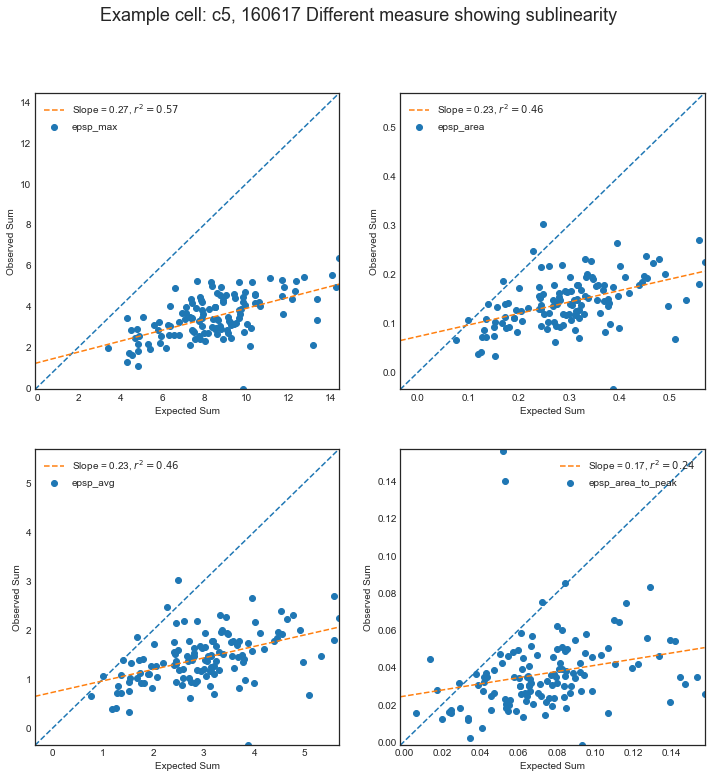

In [4]:
f, ax = plt.subplots(2,2)
n = neuronList[11]
f.suptitle("Example cell: {}, {} Different measure showing sublinearity".format(n.index, n.date), fontsize=18)
features = [0,1,2,4]
for index,feature in enumerate(features):
    expected, observed = [], []
    for exp in n:
        for sqr in exp:
            if sqr > 1:
                if sqr == 5:
                    expected, observed = zip(*[(exp[sqr].coordwise[coord].expected_feature[feature],exp[sqr].coordwise[coord].average_feature[feature]) for coord in exp[sqr].coordwise])
    i,j = index/2, index%2
    ax[i][j].scatter(expected, observed, label=n.features[feature])
    minLim, maxLim = min(expected + observed), max(expected + observed)
    ax[i][j].plot((minLim, maxLim), (minLim, maxLim),'--')
    slope, intercept, r2, pval,stderr = ss.linregress(expected, observed)
    expArray = np.linspace(minLim, maxLim,100)
    ax[i][j].plot(expArray, slope*expArray + intercept,'--', label="Slope = {:.2f}, $r^2={:.2f}$".format(slope, r2))
    ax[i][j].set_xlim(minLim, maxLim)
    ax[i][j].set_ylim(minLim, maxLim)
    ax[i][j].set_xlabel("Expected Sum")
    ax[i][j].set_ylabel("Observed Sum")
    ax[i][j].legend(loc='best')
f.set_figheight(12)
f.set_figwidth(12)
plt.show()

## 3 E: Ratios of O/E mostly sublinear

In [9]:
def figureE(feature = 0):
    ''' Plotting to show sublinearity of CA3 inputs at CA1. '''
    ratio = []
    numNeurons = 0
    numBins = 120
    for neuron in neuronList:
        for experiment in neuron.experiment:
            if experiment == "Control":            
                numNeurons+=1
                for numSq in neuron.experiment[experiment]:
                    if numSq > 1:
                        #if 5 in neuron.experiment[experiment]: # If one vs five required
                        coords = neuron.experiment[experiment][numSq].coordwise
                        for coord in coords:
                            try:
                                if feature in coords[coord].average_feature and coords[coord].expected_feature:
                                    if not np.isnan(coords[coord].average_feature[feature]/coords[coord].expected_feature[feature]) and not np.isinf(coords[coord].average_feature[feature]/coords[coord].expected_feature[feature]):
                                        ratio.append(coords[coord].average_feature[feature]/coords[coord].expected_feature[feature])
                            except:
                                print ("Couldn't append to ratio, perhaps feature not found")
    ratio = np.array(ratio)
    gt_one = ratio[np.where(ratio>1)]
    frac_gt_one = round((float(len(gt_one))/len(ratio))*1e2,2)
    #print [x for x in ratio]
    f, ax = plt.subplots()
    f.set_figheight(8)
    f.set_figwidth(8)
    ax.hist(ratio, bins=numBins)
    ax.set_title("Sublinearity of input summation")
    ax.axvline(1.0, linestyle='dashed', linewidth=2)
    ax.set_xlabel("O/E")
    ax.set_ylabel("Frequency")
    ax.annotate("{} %".format(frac_gt_one), xy=(1, 800), xytext=(1.5, 800), textcoords='data', arrowprops=dict(connectionstyle="arc3", arrowstyle = "<-"))
    plt.show()
    print ("Legend text: Number of cells: {}, number of points: {}, fraction of points greater than one: {}".format(numNeurons, len(ratio), frac_gt_one ))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


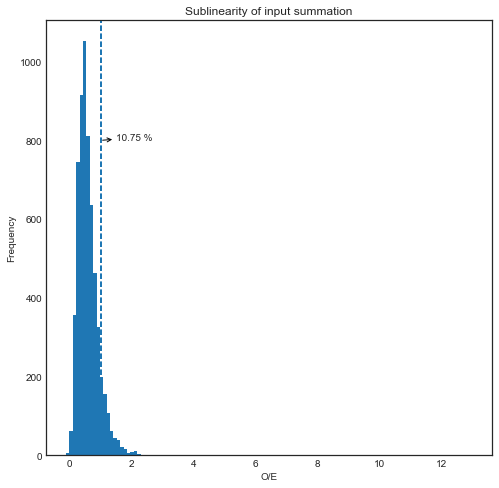

Legend text: Number of cells: 49, number of points: 6064, fraction of points greater than one: 10.75


In [10]:
figureE()

## F: Regression slopes differ between cells

In [11]:
def figureF(feature = 0):
    ''' Plotting to show sublinearity of CA3 inputs at CA1. '''
    numBins = 20
    numSq = 5
    feature = 0
    slopes = []
    for neuron in neuronList:
        for experiment in neuron.experiment:
            if experiment == "Control":            
                    try:
                        slope = neuron.experiment[experiment][numSq].regression_coefficients[feature]['slope']
                        if not np.isnan(slope):
                            slopes.append(neuron.experiment[experiment][numSq].regression_coefficients[feature]['slope'])
                    except:
                        print ("Doesn't have {} square input".format(numSq))
    print (slopes)
    f, ax = plt.subplots()
    f.set_figheight(8)
    f.set_figwidth(8)
    ax.hist(slopes,bins=numBins)
    ax.set_title("Variability of slopes between cells")
    ax.axvline(1.0, linestyle='dashed', linewidth=2)
    ax.set_xlabel("Slopes")
    ax.set_ylabel("Number of cells")
    ax.set_xlim(xmin=-1.0, xmax=2.0)
    plt.show()

Doesn't have 5 square input
Doesn't have 5 square input
Doesn't have 5 square input
Doesn't have 5 square input
Doesn't have 5 square input
Doesn't have 5 square input
Doesn't have 5 square input
[0.44108061782391944, 0.82916980424324238, 0.34272897404315489, 0.50485663609418274, 0.10510301937759157, 0.46763050227866282, 0.63928281431893319, -0.065299637895031015, 0.26736486153663075, 0.04706707834265289, 0.3192481698191002, 0.174424283086558, -0.02978580380142368, 0.38578678336863415, 0.16059020256091919, 0.26611843310212735, 0.48114459901706247, 0.4216898754083781, 0.42322085514448848, 0.52113916773113833, 0.53987391679584074, 0.028628735186219834, 0.4218479793905513, 0.59554530975909226, 0.85321432664637209, -0.0036352283367976209, 0.11989547376397006, 0.18797686144358161, 0.48182394303793191, 0.27485152291077974, 1.1750178092249737, 0.55006795500693051, 0.90944652959240435, 0.88238031677616768, 0.58359670772204486, 0.39093876476172118, 0.85477938132538855, 0.480004895940497, 0.3639

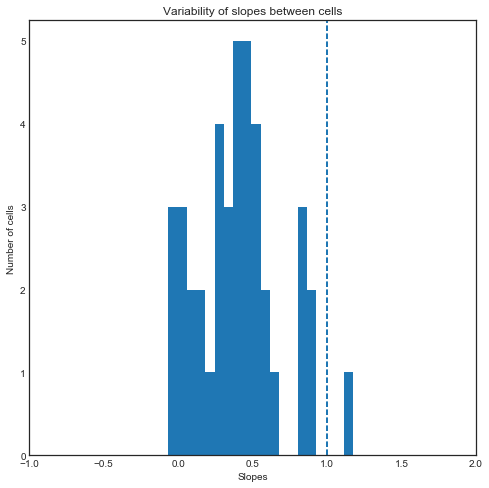

In [12]:
figureF()